In [198]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

df = pd.read_csv(r'C:\Users\PC\OneDrive\Desktop\Python hehe\GDG challenge\Renewable_Energy_Usage_Sampled.csv')
df= df.drop(columns= ["Household_ID"])

In [199]:
print("Data types for each variable:")
print(df.dtypes)
print()
print("Unique values of each variables:")
print(df.nunique())

Data types for each variable:
Region                object
Country               object
Energy_Source         object
Monthly_Usage_kWh    float64
Year                   int64
Household_Size         int64
Income_Level          object
Urban_Rural           object
Adoption_Year          int64
Subsidy_Received      object
Cost_Savings_USD     float64
dtype: object

Unique values of each variables:
Region                 6
Country               25
Energy_Source          5
Monthly_Usage_kWh    995
Year                   5
Household_Size         8
Income_Level           3
Urban_Rural            2
Adoption_Year         15
Subsidy_Received       2
Cost_Savings_USD     989
dtype: int64


In [200]:
print("For nominal variables (Income_level): label encoding, else: one hot encoding")
print("For Country & Region, each has a large number of unique values, with respect to 25 and 6")
print("=> considering if we keep or remove these two to avoid high dimensionality")

For nominal variables (Income_level): label encoding, else: one hot encoding
For Country & Region, each has a large number of unique values, with respect to 25 and 6
=> considering if we keep or remove these two to avoid high dimensionality


In [201]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include='number').columns
categorical_cols = df.select_dtypes(include='object').columns

# Columns to exclude from Label Encoding
excluded_cols = ["Energy_Source", "Urban_Rural", "Subsidy_Received"]

# Dictionary to store label mappings
label_mappings = {}

# Label encode all categorical columns EXCEPT the excluded ones
for col in categorical_cols:
    if col not in excluded_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))  # convert to string to avoid issues
        mapping = dict(zip(le.classes_, le.transform(le.classes_)))
        label_mappings[col] = mapping
        print(f"Mapping for '{col}': {mapping}")

# One-Hot Encode
df = pd.get_dummies(df, columns=["Energy_Source"], drop_first=True)
df = pd.get_dummies(df, columns=["Urban_Rural"], drop_first=True)
df = pd.get_dummies(df, columns=["Subsidy_Received"], drop_first=True)

# Optional: check result
print(df.head())
print(df.info())



Mapping for 'Region': {'Africa': np.int64(0), 'Asia': np.int64(1), 'Australia': np.int64(2), 'Europe': np.int64(3), 'North America': np.int64(4), 'South America': np.int64(5)}
Mapping for 'Country': {'Argentina': np.int64(0), 'Australia': np.int64(1), 'Brazil': np.int64(2), 'Canada': np.int64(3), 'Chile': np.int64(4), 'China': np.int64(5), 'Colombia': np.int64(6), 'Egypt': np.int64(7), 'France': np.int64(8), 'Germany': np.int64(9), 'Ghana': np.int64(10), 'India': np.int64(11), 'Indonesia': np.int64(12), 'Italy': np.int64(13), 'Japan': np.int64(14), 'Kenya': np.int64(15), 'Mexico': np.int64(16), 'New Zealand': np.int64(17), 'Nigeria': np.int64(18), 'Peru': np.int64(19), 'South Africa': np.int64(20), 'South Korea': np.int64(21), 'Spain': np.int64(22), 'UK': np.int64(23), 'USA': np.int64(24)}
Mapping for 'Income_Level': {'High': np.int64(0), 'Low': np.int64(1), 'Middle': np.int64(2)}
   Region  Country  Monthly_Usage_kWh  Year  Household_Size  Income_Level  \
0       4       24           

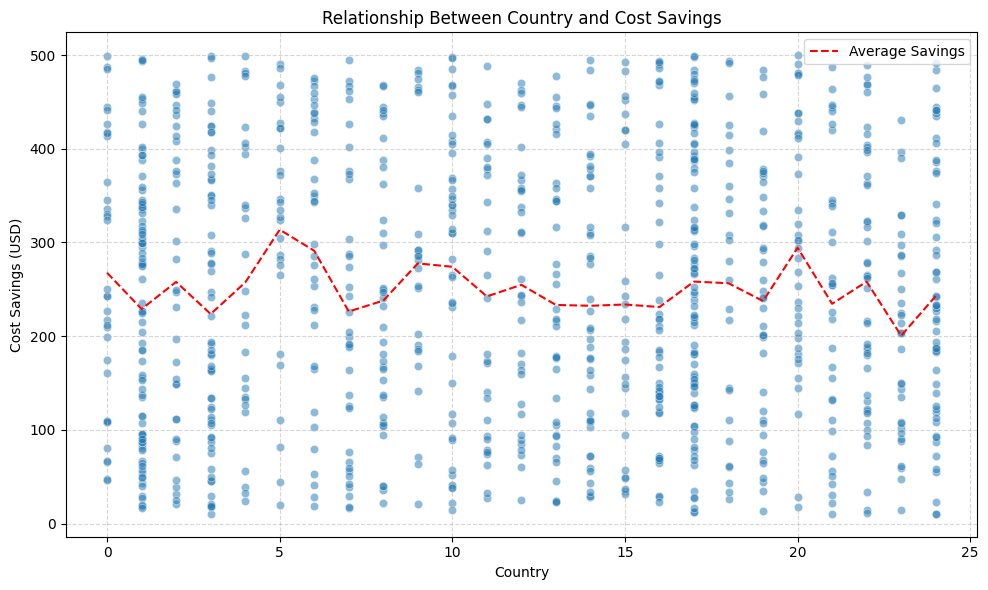

The range of cost savings considering every country is (200, 310)
=> no significant findings here => remove to avoid high dimensionality


In [202]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Country'], df['Cost_Savings_USD'], alpha=0.5, edgecolors='w', linewidth=0.5)
avg_savings_by_regions = df.groupby('Country')['Cost_Savings_USD'].mean().reset_index()
plt.plot(avg_savings_by_regions['Country'], avg_savings_by_regions['Cost_Savings_USD'], color='red', linestyle='--', label='Average Savings')
plt.title('Relationship Between Country and Cost Savings')
plt.xlabel('Country')
plt.ylabel('Cost Savings (USD)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
print("The range of cost savings considering every country is (200, 310)")
print("=> no significant findings here => remove to avoid high dimensionality")


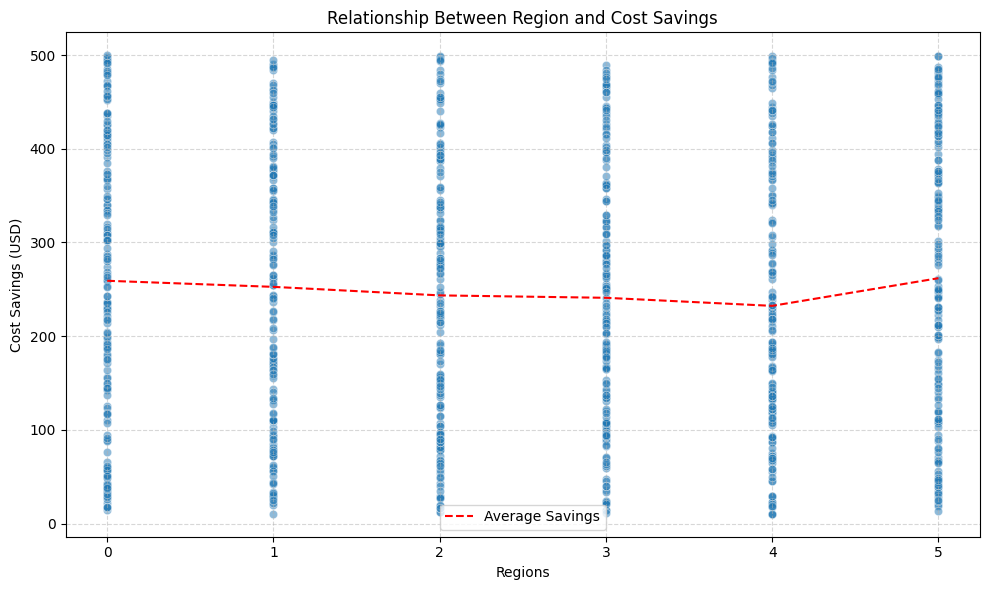

The graph barely illustrates any difference of cost savings among regions => can remove Region


In [203]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Region'], df['Cost_Savings_USD'], alpha=0.5, edgecolors='w', linewidth=0.5)
avg_savings_by_regions = df.groupby('Region')['Cost_Savings_USD'].mean().reset_index()
plt.plot(avg_savings_by_regions['Region'], avg_savings_by_regions['Cost_Savings_USD'], color='red', linestyle='--', label='Average Savings')
plt.title('Relationship Between Region and Cost Savings')
plt.xlabel('Regions')
plt.ylabel('Cost Savings (USD)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
print("The graph barely illustrates any difference of cost savings among regions => can remove Region")

Covariance matrix:


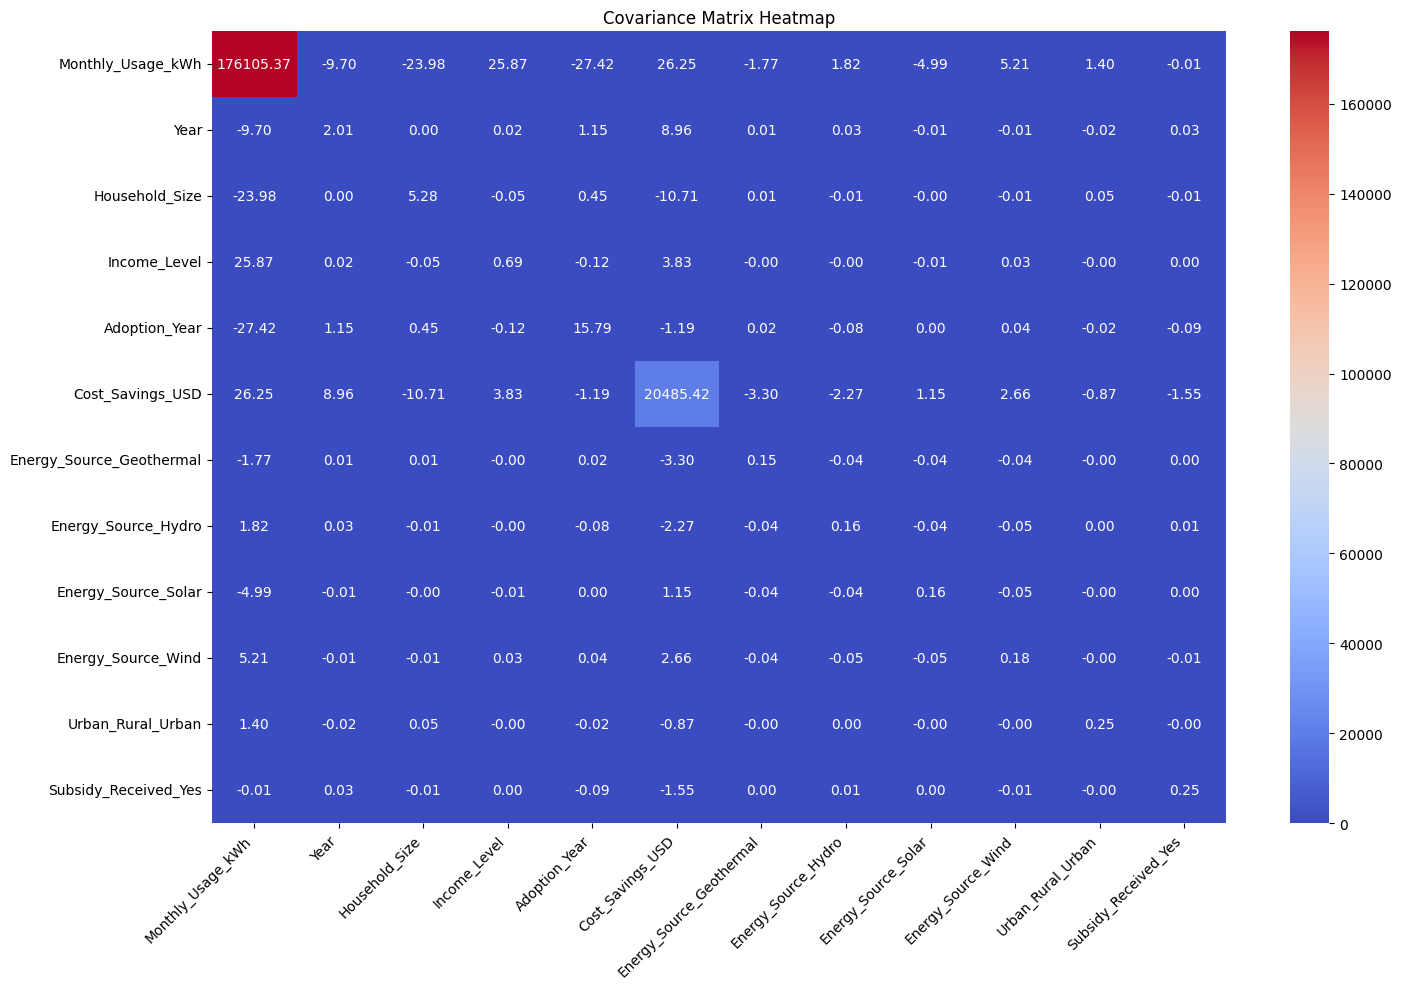

Correlation matrix:


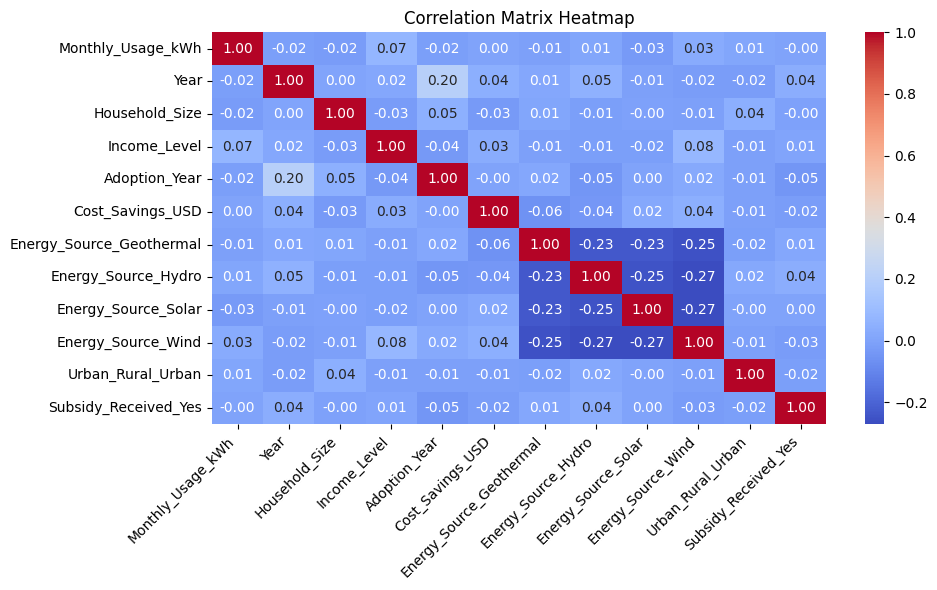

From 2 figures we can see that the relationships among variables are weak (Values in the correlation matrix is near to 0)
=> can be affected by other factorsfactors


In [204]:
# Covariance matrix including categorical feature
print("Covariance matrix:")
heh= df.drop(columns= ["Country","Region"])
covar_matrix= heh.cov()
plt.figure(figsize=(15, 10))
sns.heatmap(covar_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Covariance Matrix Heatmap")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better fit
plt.yticks(rotation=0)               # Keep y-axis labels horizontal
plt.tight_layout()     
plt.show()


# Correlation matrix including categorical feature
print("Correlation matrix:")
corr_matrix= heh.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better fit
plt.yticks(rotation=0)               # Keep y-axis labels horizontal
plt.tight_layout()     
plt.show()
print("From 2 figures we can see that the relationships among variables are weak (Values in the correlation matrix is near to 0)")
print ("=> can be affected by other factorsfactors")

In [205]:
df= df.drop(columns= ["Country", "Region"])
df.to_csv("cleaned_data.csv")